# 项目实战：房地产市场分析

- 1. 导入库
- 2. 导入数据
- 3. 数据概览
- 4. 数据清洗
- 5. 新数据特征构造
- 6. 问题分析及可视化

## 1.导入库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'
rcParams['axes.unicode_minus'] = False

## 2.导入数据

In [3]:
df = pd.read_csv('data/house_sales.csv')

## 3.数据概览

In [9]:
print('行数：',len(df))
print('列数：',len(df.columns))
df.head()

行数： 106118
列数： 12


,city,address,area,floor,name,price,province,rooms,toward,unit,year,origin_url
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建,https://hf.esf.fang.com/chushou/3_404372096.htm


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


## 4.数据清洗

> 这里我是先删除了无用值和重复值，再删除了缺失值，所以数据先后有些不一样，不过总体上效果是一样的

### 处理 缺失值、无用值、重复值

In [51]:
# 检查是否有缺失值
df.isna().sum()

city            0
address       826
area          388
floor        1023
name          277
price         277
province        0
rooms        1017
toward        434
unit          277
year        23330
dtype: int64

In [54]:
# 删除缺失值
df.dropna(inplace=True)
print(df.isna().sum())
print(len(df))

city        0
address     0
area        0
floor       0
name        0
price       0
province    0
rooms       0
toward      0
unit        0
year        0
dtype: int64
28104


In [11]:
# 删除无用的数据列
df.drop(columns='origin_url',inplace=True)
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建


In [12]:
# 检查是否有重复值
df.duplicated().sum()

np.int64(54585)

In [14]:
# 删除重复数据
df.drop_duplicates(inplace=True)
print('number of records:',len(df))

number of records: 51533


### 处理数据类型

In [57]:
# 面积的数据类型转换
df['area'] = df['area'].str.replace('㎡','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28104 entries, 0 to 106088
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      28104 non-null  object 
 1   address   28104 non-null  object 
 2   area      28104 non-null  float64
 3   floor     28104 non-null  object 
 4   name      28104 non-null  object 
 5   price     28104 non-null  object 
 6   province  28104 non-null  object 
 7   rooms     28104 non-null  object 
 8   toward    28104 non-null  object 
 9   unit      28104 non-null  object 
 10  year      28104 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.6+ MB


In [60]:
# 售价的数据类型转换
df['price'] = df['price'].str.replace('万','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28104 entries, 0 to 106088
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      28104 non-null  object 
 1   address   28104 non-null  object 
 2   area      28104 non-null  float64
 3   floor     28104 non-null  object 
 4   name      28104 non-null  object 
 5   price     28104 non-null  float64
 6   province  28104 non-null  object 
 7   rooms     28104 non-null  object 
 8   toward    28104 non-null  object 
 9   unit      28104 non-null  object 
 10  year      28104 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.6+ MB


In [61]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50.0,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.0,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167元/㎡,2012年建


In [65]:
# 朝向的数据类型转换
df['toward'] = df['toward'].astype('category')
df['toward'].value_counts()

toward
南北向    15946
南向      9405
东南向     1114
东向       448
西南向      308
北向       276
西向       182
东西向      162
西北向      138
东北向      125
Name: count, dtype: int64

In [67]:
# 单价的数据类型转换
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)

In [68]:
# 建造年份的数据类型转换
df['year'] = df['year'].str.replace('年建','').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28104 entries, 0 to 106088
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   city      28104 non-null  object  
 1   address   28104 non-null  object  
 2   area      28104 non-null  float64 
 3   floor     28104 non-null  object  
 4   name      28104 non-null  object  
 5   price     28104 non-null  float64 
 6   province  28104 non-null  object  
 7   rooms     28104 non-null  object  
 8   toward    28104 non-null  category
 9   unit      28104 non-null  float64 
 10  year      28104 non-null  int64   
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 2.4+ MB


### 处理异常值

In [73]:
# 房屋面积的异常处理
df = df[(df['area']<600) & (df['area']>20)]
print(len(df))

28079


In [77]:
# 房屋售价的异常处理 IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(f'low:{low} , high:{high}')
df = df[(df['price']>low) & (df['price']<high)]
print(len(df))

low:-45.0 , high:267.0
25382


## 5.新数据特征的构造

In [79]:
# district
df['district'] = df['address'].str.split('-').str[0]

In [81]:
# floor_type
df['floor_type'] = df['floor'].str.split('（').str[0].astype('category')

In [88]:
# 直辖市 zxs
df['zxs'] = df['city'].str.contains('北京|上海|重庆|天津')
print(sum(df['zxs']))

215


In [90]:
# bedrooms
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)

In [94]:
# livingrooms
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)

In [96]:
# building_age
df['building_age'] = 2025 - df['year']

In [98]:
# price_level
df['price_level'] = pd.cut(df['price'], bins=4, labels=['低价','中价','高价','豪华'])

In [101]:
print(len(df[df['price_level']=='豪华']))

2100


In [99]:
df.sample(5)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,zxs,bedrooms,livingrooms,building_age,price_level
93404,南充,北干道-北干道锦亭路,80.0,高层（共6层）,境界,52.6,四川,3室2厅,东南向,6575.0,2015,北干道,高层,False,3,2,10,低价
8608,兰州,五泉广场-火车站西路551-553号,120.0,中层（共8层）,五泉电信局家属院,128.0,甘肃,2室2厅,西南向,10667.0,2010,五泉广场,中层,False,2,2,15,中价
101632,邕宁,仙葫经济开发区-仙葫大道中9号,118.7,高层（共18层）,天池山·中脊,103.0,广西,3室2厅,南北向,8677.0,2011,仙葫经济开发区,高层,False,3,2,14,中价
41766,蚌埠,万达广场-东海大道与延安路交汇处,120.0,中层（共34层）,蚌埠新地城市广场,105.0,安徽,4室2厅,南北向,8750.0,2015,万达广场,中层,False,4,2,10,中价
15670,中山,中山港-九沙路7号(东镇东一路与九沙路交汇处),88.0,中层（共33层）,泰瑞居,93.0,广东,3室2厅,南北向,10568.0,2019,中山港,中层,False,3,2,6,中价


## 6.问题分析及可视化

### 问题1：哪些变量最影响房价？面积、楼层、房间数哪个影响更大？

In [ ]:
'''
问题编号: A1
问题: 哪些变量最影响房价？面积、楼层、房间数哪个影响更大？
分析主题: 特征相关性
分析目标: 了解房屋各特征对房价的线性影响
分组字段: 无
指标/方法: 皮尔逊相关系数
'''

In [102]:
alpha = df[['price','area','unit','bedrooms','livingrooms','building_age']].corr()
alpha['price'].sort_values(ascending=False)
print(alpha)

                 price      area      unit  bedrooms  livingrooms  \
price         1.000000  0.437029  0.730997  0.321870     0.203615   
area          0.437029  1.000000 -0.201596  0.770138     0.502313   
unit          0.730997 -0.201596  1.000000 -0.179784    -0.155558   
bedrooms      0.321870  0.770138 -0.179784  1.000000     0.506110   
livingrooms   0.203615  0.502313 -0.155558  0.506110     1.000000   
building_age  0.087499 -0.087509  0.197860 -0.130630    -0.201752   

              building_age  
price             0.087499  
area             -0.087509  
unit              0.197860  
bedrooms         -0.130630  
livingrooms      -0.201752  
building_age      1.000000  


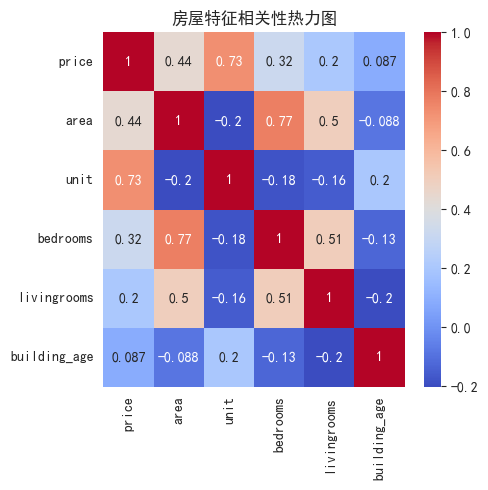

In [105]:
plt.figure(figsize=(5,5))
sns.heatmap(alpha,cmap='coolwarm',annot=True)
plt.title('房屋特征相关性热力图')
plt.tight_layout()

### 问题2：全国房价总体分布是怎样的？是否存在极端值？

In [ ]:
'''
问题编号: A2
问题: 全国房价总体分布是怎样的？是否存在极端值？
分析主题: 描述性统计
分析目标: 概览数值型字段的分布特征
分组字段: 无
指标/方法: 平均数/中位数/四分位数/标准差
'''

In [106]:
df.describe()

,area,price,unit,year,bedrooms,livingrooms,building_age
count,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000
mean,102.683130,112.218826,11273.759869,2013.105468,2.697305,1.845205,11.894532
std,32.827656,54.400754,5354.765656,6.024982,0.791970,0.407410,6.024982
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,2.000000
25%,85.000000,70.307500,7520.250000,2011.000000,2.000000,2.000000,8.000000
50%,99.000000,100.000000,10151.000000,2015.000000,3.000000,2.000000,10.000000
75%,122.000000,145.000000,13846.000000,2017.000000,3.000000,2.000000,14.000000
max,470.000000,266.300000,85288.000000,2023.000000,9.000000,12.000000,49.000000


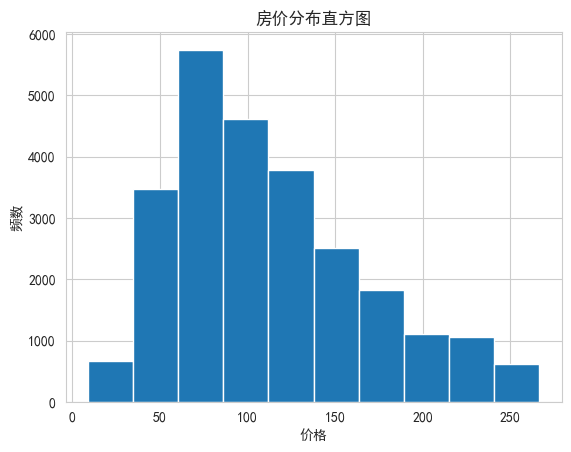

In [108]:
plt.hist(df['price'],bins=10)
plt.title('房价分布直方图')
plt.xlabel('价格')
plt.ylabel('频数')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

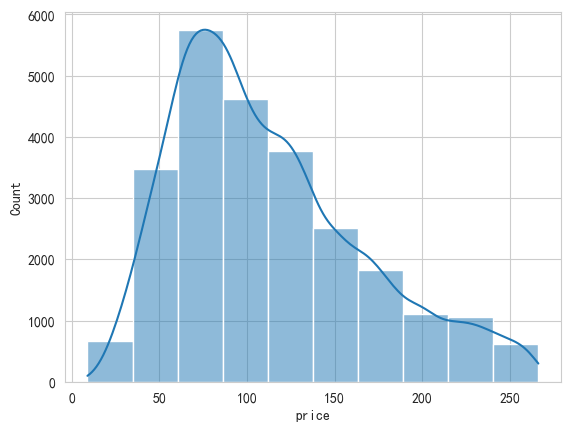

In [109]:
sns.histplot(data=df,x='price',bins=10,kde=True)

### 问题3：哪些城市房价最高？直辖市与非直辖市差异如何？

In [ ]:
'''
问题编号: A3
问题: 哪些城市房价最高？直辖市与非直辖市差异如何？
分析主题: 城市对比
分析目标: 比较不同城市房价水平
分组字段: city
指标/方法: 均价/单价中位数/箱线图
'''

In [126]:
city_stats = df.groupby('city').agg({
    'price':['mean','median','count','std'],
    'unit':['mean','median','std']
})

display(city_stats.sort_values(('unit','mean'),ascending=False).head(10))

price                                  unit                       
            mean median count        std          mean   median           std
city                                                                         
深圳    219.571429  228.0     7  29.832070  41859.428571  38012.0  11716.921138
上海    172.206250  199.5    48  72.032721  25832.645833  26439.0  12425.395925
福州    180.447619  185.0    42  52.949729  24473.642857  21869.5   8651.084161
淳安    164.260000  188.5    30  65.186209  24298.000000  22601.0  10344.887086
蓟州    178.643438  170.5    64  52.734045  24271.500000  20175.0  13903.277891
厦门    190.966667  200.0    15  54.715650  23965.266667  25628.0   6462.351158
桐庐    161.672564  175.0    39  68.054547  23774.205128  23263.0   8965.947081
永泰    169.945455  174.5    44  51.031237  22960.704545  21349.0   8420.720802
苏州    191.036207  196.0    58  41.822711  22837.637931  22109.0   4114.204511
三亚    188.647059  190.0    34  42.003522  22732.441176  21236.5   4454.201225

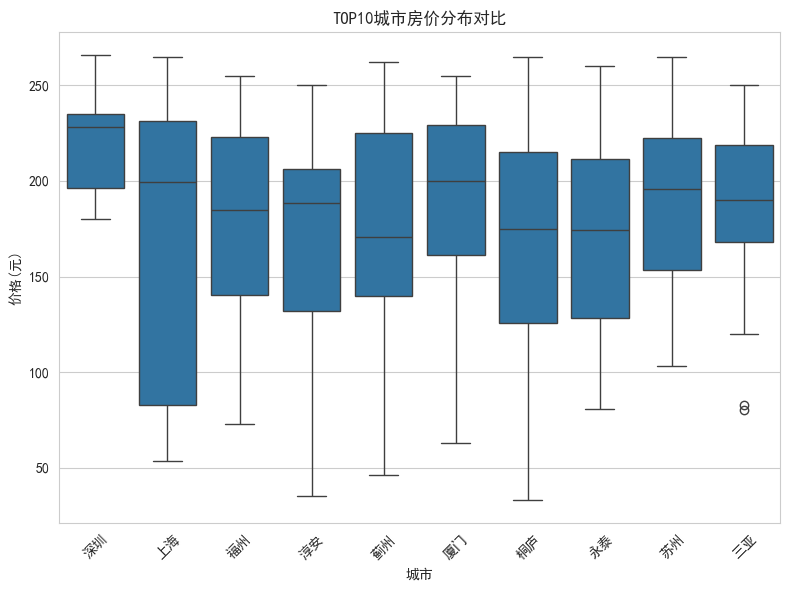

In [143]:
top10 = city_stats.sort_values(('unit','mean'),ascending=False).head(10).index
df_top = df[df['city'].isin(top10)]

plt.figure(figsize=(8,6))
sns.boxplot(x='city',y='price',data=df_top,order=top10)  # order是横轴从左至右的顺序
plt.title('TOP10城市房价分布对比')
plt.xlabel('城市')
plt.ylabel('价格(元)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


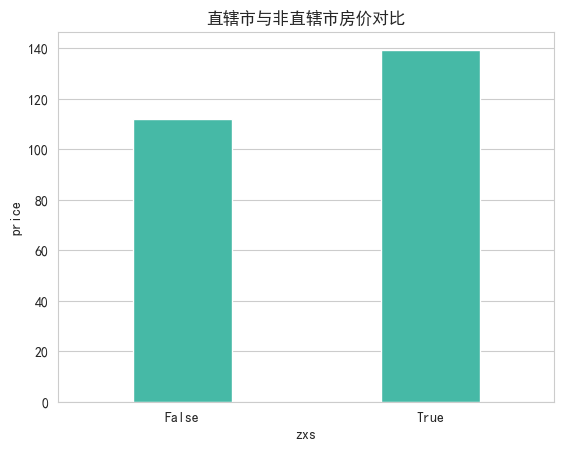

In [168]:
plt.title('直辖市与非直辖市房价对比')
sns.barplot(x='zxs',y='price',data=df,estimator='mean',errorbar=None,width=0.4,color=(0.2,0.8,0.7))
plt.show()

### 问题4：高价房在面积、楼层等方面有什么特征？

In [ ]:
'''
问题编号: A4
问题: 高价房在面积、楼层等方面有什么特征？
分析主题: 价格分层
分析目标: 识别不同价位房屋特征差异
分组字段: 价格分段(低中高)
指标/方法: 列联表/卡方检验
'''
"""A4 价格分层特征差异分析"""

In [272]:
price_group = df.groupby('price_level',observed=True).agg({
    'area':['mean','median','std'],
    'unit':['mean','median','std'],
    'bedrooms':['mean','median','std'],
    'livingrooms':['mean','median','std'],
    'building_age':['mean','median','std']
})
display(price_group.round(2))

area                    unit                   bedrooms         \
               mean median    std      mean   median      std     mean median   
price_level                                                                     
低价            83.49   86.0  28.73   7178.18   6667.0  2725.54     2.33    2.0   
中价           103.72  100.0  26.38  10444.36   9835.0  3307.28     2.74    3.0   
高价           115.82  115.0  33.77  15390.56  14471.0  4964.96     2.92    3.0   
豪华           129.01  128.0  38.72  19436.35  18248.0  6172.83     3.14    3.0   

                  livingrooms              building_age               
              std        mean median   std         mean median   std  
price_level                                                           
低价           0.82        1.70    2.0  0.50        11.55   10.0  6.52  
中价           0.71        1.88    2.0  0.35        11.61   10.0  5.78  
高价           0.75        1.91    2.0  0.36        12.46   11.0  5.76  
豪华           0.76        1.95    2.0  0.33        13.22   12.0  5.96

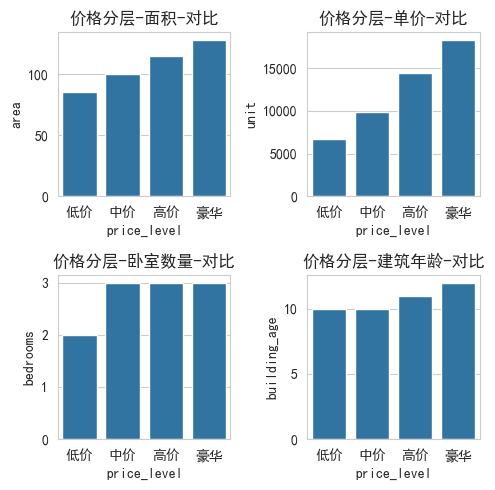

In [205]:
plt.figure(figsize=(5,5))

plt.subplot(221)
sns.barplot(x='price_level',y='area',data=df,estimator='median',errorbar=None)
plt.title('价格分层-面积-对比')

plt.subplot(222)
sns.barplot(x='price_level',y='unit',data=df,estimator='median',errorbar=None)
plt.title('价格分层-单价-对比')

plt.subplot(223)
sns.barplot(x='price_level',y='bedrooms',data=df,estimator='median',errorbar=None)
plt.title('价格分层-卧室数量-对比')

plt.subplot(224)
sns.barplot(x='price_level',y='building_age',data=df,estimator='median',errorbar=None)
plt.title('价格分层-建筑年龄-对比')

plt.tight_layout()
plt.show()

### 问题5：哪种户型最受欢迎？三室比两室贵多少？

In [ ]:
'''
问题编号: A5
问题: 哪种户型最受欢迎？三室比两室贵多少？
分析主题: 户型分析
分析目标: 分析不同户型的市场表现
分组字段: rooms
指标/方法: 占比/平均单价/溢价率
'''

In [232]:
relationship = df[['price','bedrooms','livingrooms']].corr()
relationship['price'].sort_values(ascending=False)
print(relationship)

                price  bedrooms  livingrooms
price        1.000000   0.32187     0.203615
bedrooms     0.321870   1.00000     0.506110
livingrooms  0.203615   0.50611     1.000000


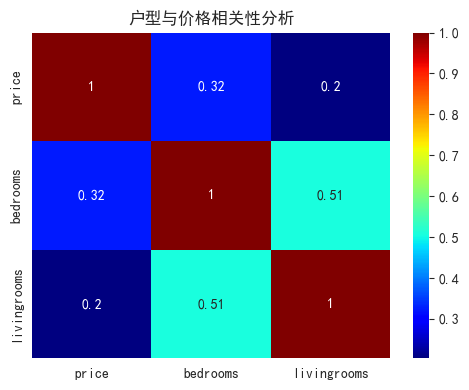

In [238]:
plt.figure(figsize=(5,4))
sns.heatmap(relationship,cmap='jet',annot=True)
plt.title('户型与价格相关性分析')
plt.tight_layout()
plt.show()

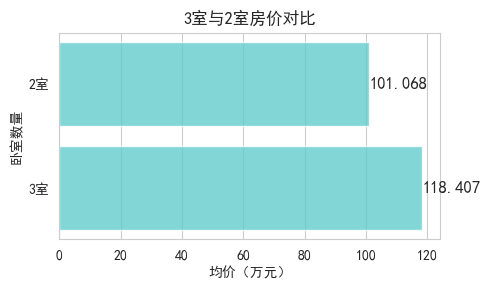

In [257]:
plt.figure(figsize=(5,3))

price_3_bedrooms = (df[df['bedrooms']==3]['price']).mean().round(3)
price_2_bedrooms = (df[df['bedrooms']==2]['price']).mean().round(3)

price = [price_3_bedrooms,price_2_bedrooms]
room_type = ['3室','2室']

plt.barh(y=room_type, width=price, color='#63cccc', alpha=0.8)

plt.title('3室与2室房价对比')
plt.xlabel('均价（万元）')
plt.ylabel('卧室数量')
plt.grid(axis='y')

for x,y in zip(price,room_type):
    plt.text(x,y,x,va='center',ha='left',fontsize=12)

plt.tight_layout()
plt.show()


### 问题6：南北向是否真比单一朝向贵？贵多少？

In [ ]:
'''
问题编号: A6
问题: 南北向是否真比单一朝向贵？贵多少？
分析主题: 朝向溢价
分析目标: 评估不同朝向的价格差异
分组字段: toward
指标/方法: 方差分析/多重比较
'''

In [273]:
toward_stats = df.groupby('toward', observed=True).agg({
    'price':['mean','median','std']
})
toward_stats = toward_stats.sort_values(('price','median'),ascending=False)
display(toward_stats.round(2))

price              
          mean median    std
toward                      
西南向     133.37  130.0  58.09
西北向     113.79  105.0  57.49
东南向     111.18  102.0  53.42
东北向     111.44  100.0  58.49
南北向     114.20  100.0  54.48
南向      109.88  100.0  53.91
东向      106.19   90.0  57.19
西向       96.95   84.0  48.58
东西向      97.67   82.0  51.68
北向       89.50   75.0  48.61

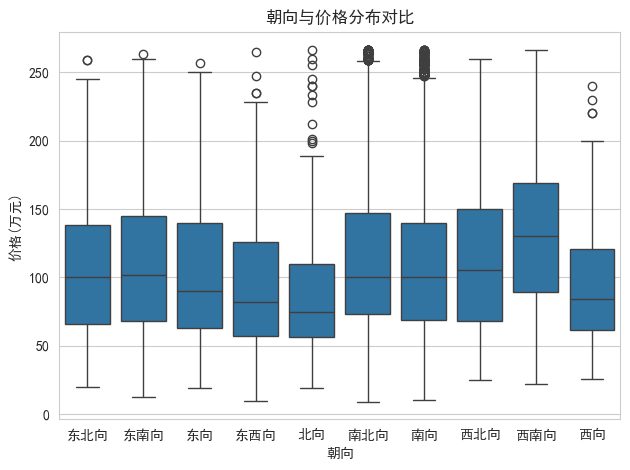

In [274]:
sns.boxplot(x='toward',y='price',data=df)
plt.title('朝向与价格分布对比')
plt.xlabel('朝向')
plt.ylabel('价格(万元)')
plt.tight_layout()
plt.show()

# Congratulations!⭐